参考文章：
- 1、归一化&KD树：https://mp.weixin.qq.com/s/RkenakI_DSXoMLwNNvUAAw
- 2、数据清洗：https://mp.weixin.qq.com/s/b2EaZmGT61Gg40qCCxvi1w
- 3、特征工程：https://mp.weixin.qq.com/s/Do-QdylYZq1wenmLkIArQA 和 https://mp.weixin.qq.com/s/W8Ub29zEc3IvkdygYp70Lw
- 4、归一化与标准化：https://ssjcoding.github.io/2019/03/27/normalization-and-standardization/
- 5、sklearn的预处理： https://www.cnblogs.com/juanjiang/archive/2019/05/30/10948849.html

# 归一化

- 目的：消除量纲，因样本不同特征单位不一定相同
- 方法：最值归一化和均值方差归一化两种常用方法
- 用途：只要是涉及求距离的算法，都需要用到归一化。如KNN、Kmeans、支持向量机等
- 注意：先划分数据集再做归一化，测试集数据依据训练集的处理规则处理(即使用训练集的均值和方差对测试集进行归一化)。因为测试数据是模拟的真实环境，真实环境中可能无法得到均值和方差，对数据进行归一化。

## 最值归一化(normalization 又称Min-Max Scaling)
- 把所有数据映射到0-1之间
- 特征的分布具有明显边界的(分数0～100分、灰度0～255)，受外部因素影响比较大
- x\' = (x-x_min)/(x_max-x_min)

### 代码实现

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 创建100个随机数
x=np.random.randint(0,100,size=100)

# 最值归一化（向量）
# 最值归一化公式，映射到0，1之间
x_n1=(x-np.min(x))/(np.max(x)-np.min(x))

# 最值归一化（矩阵）
# 创建0～100范围内的50*2的矩阵
X=np.random.randint(0,100,(50,2))

# 最值归一化公式，对于每一个维度（列方向）进行归一化
X_n1=np.empty(X.shape)
for i in range(0,X.shape[1]):
    X_n1[:,i]=(X[:,i]-np.min(X[:,i]))/(np.max(X[:,i])-np.min(X[:,i]))


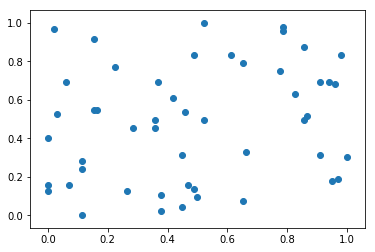

In [11]:
# 简单绘制样本，看横纵坐标
plt.scatter(X_n1[:,0],X_n1[:,1])
plt.show()

## 均值方差归一化(standardization)
-  把所有数据归一到均值为0方差为1的分布中
- 适用于数据中没有明显的边界，有可能存在极端数据值的情况
- x\'=(x-μ)/S

### 代码实现

In [12]:
# 均值方差归一化公式，对于每一个维度（列方向）进行归一化
X_s1=np.empty(X.shape)
for i in range(0,X.shape[1]):
    X_s1[:,i]=(X[:,i]-np.mean(X[:,i]))/np.std(X[:,i])

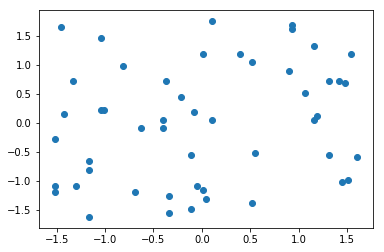

In [14]:
# 简单绘制样本，看横纵坐标
plt.scatter(X_s1[:,0],X_s1[:,1])
plt.show()

## 完整代码
- 保存至preprocessing.py 文件

In [30]:
import numpy as np

class StandardScaler:
    
    def __init__(self):
        self.mean_=None
        self.scale_=None
        
    def fit(self,X):
        """根据数据集X获得数据的均值和方差"""
        assert X.ndim>=2,"The dimension of X must be greater than or equal to 2"
        
        #  求出每个列的均值和方差
        self.mean_=np.mean(np.array([X[:,i] for i in range(X.shape[1])]),axis=1)
        self.scale_=np.std(np.array([X[:,i] for i in range(X.shape[1])]),axis=1)
        
        return self
    
    def transform(self,X):
        """将X根据StandardScaler进行均值方差归一化处理"""
        assert  X.ndim>=2,"The dimension of X must be greater than or equal to 2"
        assert self.mean_ is not None and self.scale_ is not None,\
            "must fit before transform"
        assert X.shape[1]==len(self.mean_),\
            "the feature number of X must be equal to mean_ and std_"
        
        # 创建一个浮点型矩阵，大小和X相同
        resX=np.empty(shape=X.shape)
        
        # 对于每一列（维度）都计算
        for col in range(X.shape[1]):
            resX[:,col]=(X[:,i]-np.mean_[col])/np.std_[col]
            
        return resX
    
class MinMaxScaler:
    
    def __init__(self):
        self.maxnum_=None
        self.minnum_=None
        
    def fit(self,X):
        """根据数据集X获得数据的均值和方差"""
        assert X.ndim>=2,"The dimension of X must be greater than or equal to 2"
        
        #  求出每个列的最大值和最小值
        self.maxnum_=np.max(np.array([X[:,i] for i in range(X.shape[1])]),axis=1)
        self.minnum_=np.min(np.array([X[:,i] for i in range(X.shape[1])]),axis=1)
        
        return self
    
    def transform(self,X):
        """将X根据MinMaxScaler进行最值归一化处理"""
        assert  X.ndim>=2,"The dimension of X must be greater than or equal to 2"
        assert self.maxnum_ is not None and self.minnum_ is not None,\
            "must fit before transform"
        assert X.shape[1]==len(self.maxnum_),\
            "the feature number of X must be equal to maxnum_ and minnum_"
        
        # 创建一个浮点型矩阵，大小和X相同
        resX=np.empty(shape=X.shape)
        
        # 对于每一列（维度）都计算
        for col in range(X.shape[1]):
            resX[:,col]=(X[:,i]-np.minnum_[col])/(np.maxnum_[col]-self.minnum_[col])
            
        return resX


## sklearn 实现归一化

In [2]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=555)

### 均值方差归一化

In [49]:
from sklearn.preprocessing import StandardScaler 

standardScaler =StandardScaler()

# 归一化的过程跟训练模型一样
standardScaler.fit(X_train)
standardScaler.mean_
standardScaler.scale_   # 表述数据分布范围的变量，替代std_

# 使用transform
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

### 最值归一化

In [53]:
from sklearn.preprocessing import MinMaxScaler

minmaxScaler=MinMaxScaler()

minmaxScaler.fit(X_train)

X_train_minmaxstandard=minmaxScaler.transform(X_train)
X_test_minmaxstandard=minmaxScaler.transform(X_test)